In [1]:
import matplotlib.pyplot as plt

def plot_loss(training_loss, validation_loss, title=None):
    """
    绘制训练损失和验证损失。

    参数:
    training_loss (list): 每个周期的训练损失。
    validation_loss (list): 每个周期的验证损失。
    """
    plt.figure(figsize=(10, 6))
    assert len(training_loss) == len(validation_loss)
    epochs = list(range(1, len(training_loss) + 1))
    plt.plot(epochs, training_loss, label='Training Loss', color='blue', linestyle='-', marker='o')
    plt.plot(epochs, validation_loss, label='Validation Loss', color='red', linestyle='--', marker='x')

    plt.xlabel('Epochs', fontsize=14, fontweight='bold')
    plt.ylabel('Loss', fontsize=14, fontweight='bold')
    if title is not None:
        plt.title(f'Training and Validation Loss of {title}', fontsize=16, fontweight='bold')
    else:
        plt.title(f'Training and Validation Loss', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()


## Epoch越多, 学习效果越好吗?

实验设置: training data和validation data都来自MTOB数据集,这是一本关于低资源语言的语法书.training data来自MTOB的开头,validation data来自MTOB的结尾.

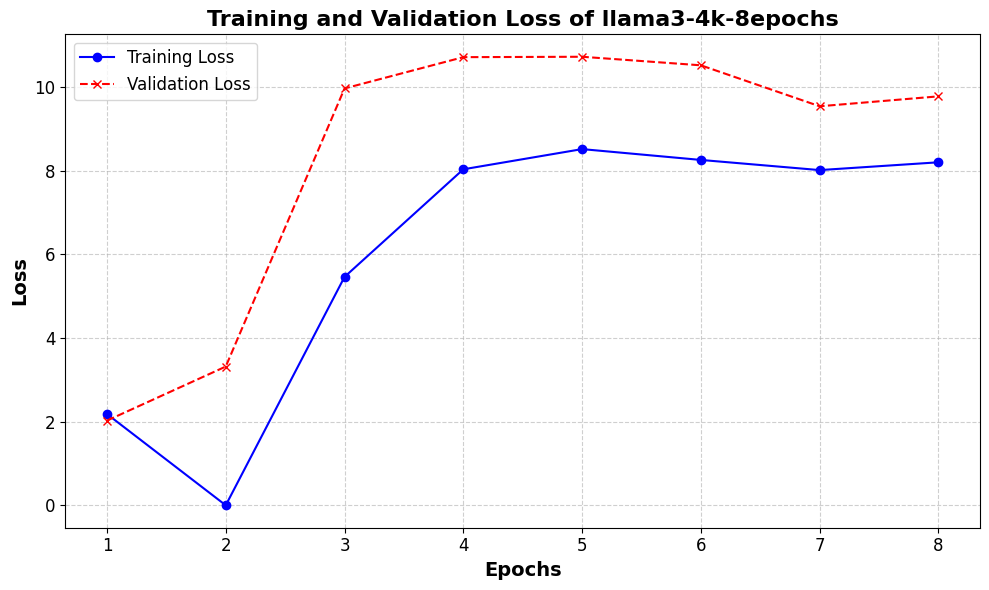

In [9]:
train_loss_of_llama3_4k_8_epochs = [2.1827964782714844, 0.00243546674028039, 5.458278656005859, 8.028902053833008, 8.511260032653809, 8.252497673034668, 8.009977340698242, 8.196222305297852]
val_loss_of_llama3_4k_8_epochs = [2.0256056785583496, 3.316929340362549, 9.960220336914062, 10.7079496383667, 10.717323303222656, 10.513176918029785, 9.53462028503418, 9.771443367004395]
plot_loss(train_loss_of_llama3_4k_8_epochs, val_loss_of_llama3_4k_8_epochs, title="llama3-4k-8epochs")

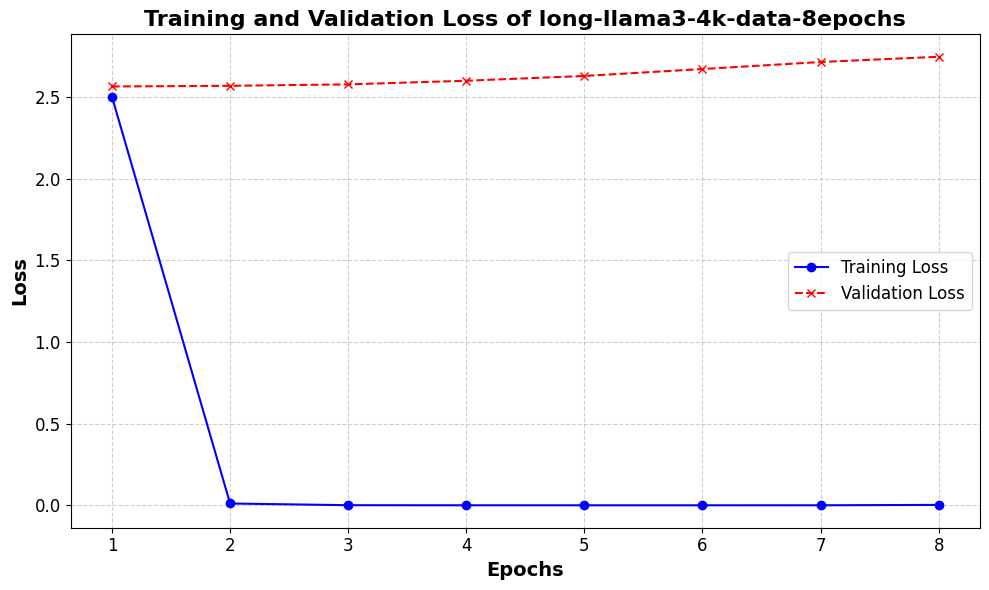

In [49]:
train_loss_of_long_llama3_4k_8_epochs = [2.501464605331421, 0.011168277822434902, 0.0006732760812155902, 0.00020868334104306996, 0.00012260049697943032, 0.00014117753016762435, 0.00022003496997058392, 0.0024849032051861286]
val_loss_of_long_llama3_4k_8_epochs = [2.5646860599517822, 2.5688672065734863, 2.5776987075805664, 2.599916696548462, 2.6291816234588623, 2.671579360961914, 2.714585781097412, 2.7467260360717773]
plot_loss(training_loss=train_loss_of_long_llama3_4k_8_epochs, validation_loss=val_loss_of_long_llama3_4k_8_epochs, title='long-llama3-4k-data-8epochs')

对比LLama3和Long-LLama3在8个epochs,训练集大小为4k的学习表现,可以发现:
- LLama3的training loss和validation loss都随着epoch数量增加而上升.这个现象好理解,LLama3的context window只有8K.
- Long-LLama3的training loss随着epoch数量增加而下降, 而且第2个epoch时 loss就下降到了0.01, 但是validation loss随着epoch数量增加而上升.

为什么Long-LLama3的validation loss会上升?这是类似过拟合现象吗? 还是说validation data有问题?

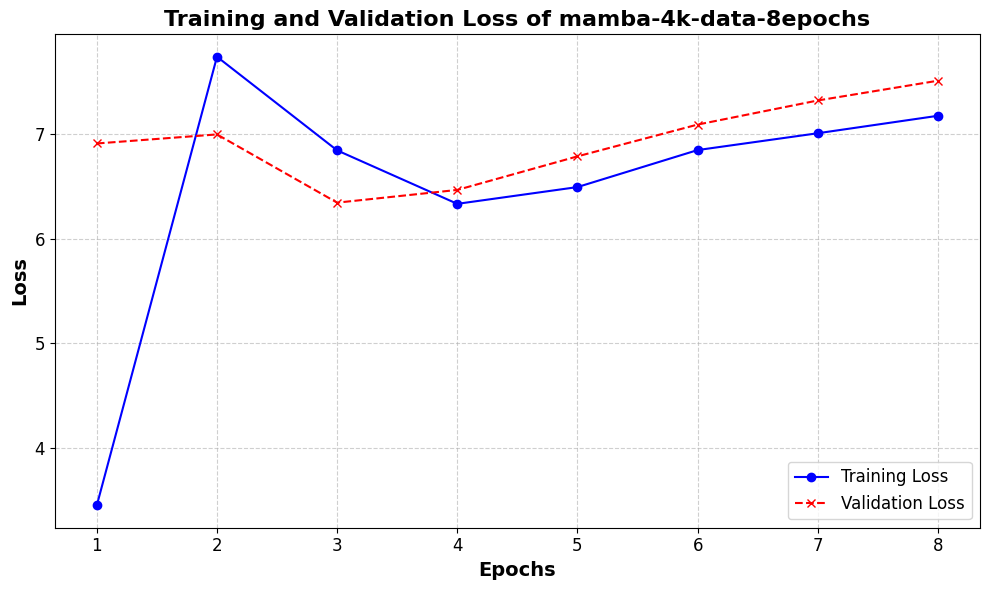

In [52]:
train_loss_of_mamba_4k_8epochs = [3.4479176998138428, 7.739257335662842, 6.843430519104004, 6.332038402557373, 6.4924821853637695, 6.846576690673828, 7.007565021514893, 7.174575328826904]
validation_loss_of_mamba_4k_8epochs = [6.909641265869141, 6.9962663650512695, 6.343453407287598, 6.465298175811768, 6.786285877227783, 7.090426445007324, 7.3210601806640625, 7.510122299194336]
plot_loss(training_loss=train_loss_of_mamba_4k_8epochs, validation_loss=validation_loss_of_mamba_4k_8epochs, title='mamba-4k-data-8epochs')

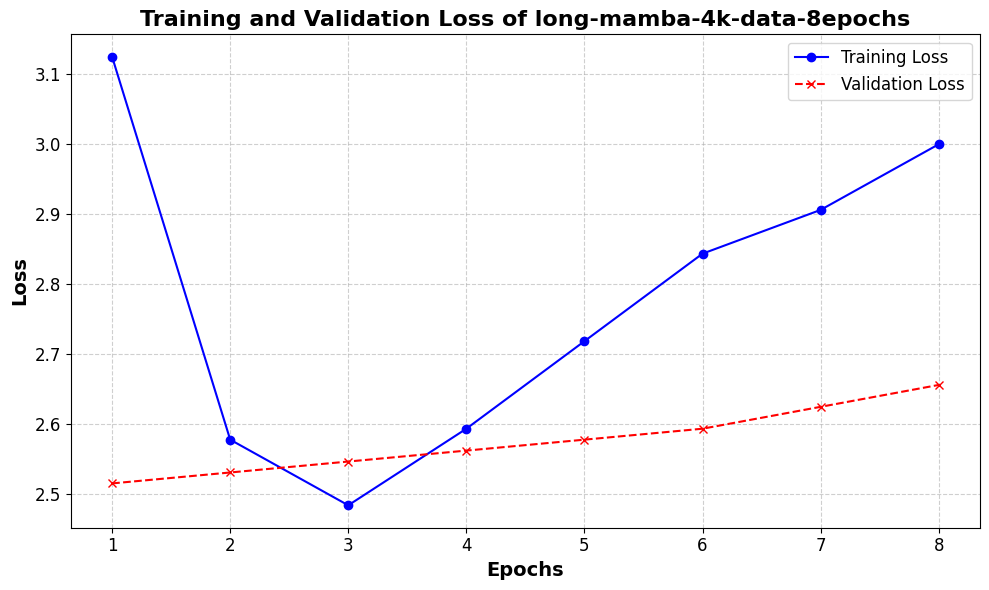

In [50]:
train_loss_of_long_mamba_4k_8epochs = [3.125, 2.578125, 2.484375, 2.59375, 2.71875, 2.84375, 2.90625, 3.0]
validation_loss_of_long_mamba_4k_8epochs = [2.515625, 2.53125, 2.546875, 2.5625, 2.578125, 2.59375, 2.625, 2.65625]
plot_loss(train_loss_of_long_mamba_4k_8epochs, validation_loss_of_long_mamba_4k_8epochs, title="long-mamba-4k-data-8epochs")

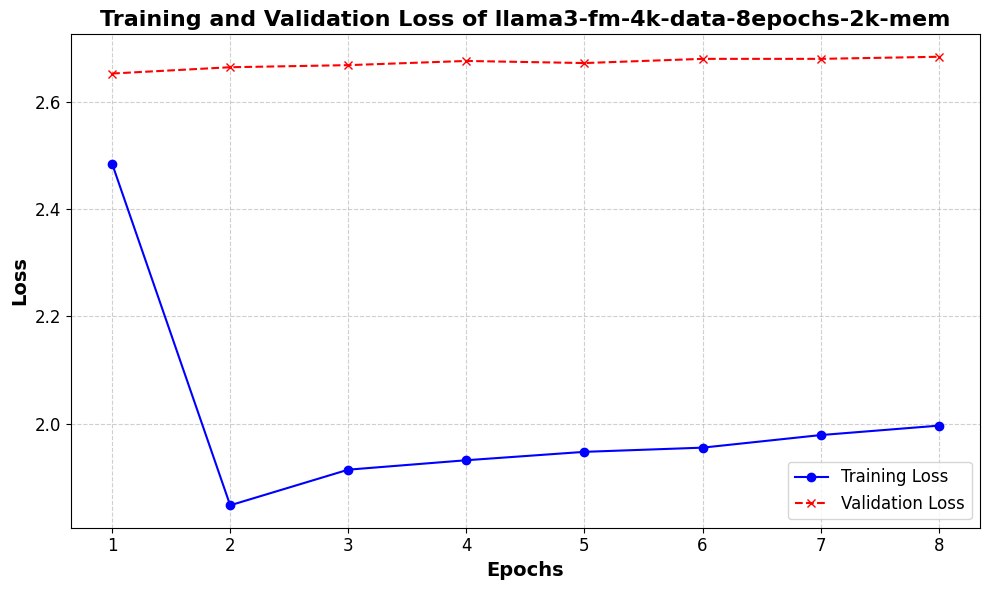

In [51]:
train_loss_of_llama3_fm_4k_8_epochs = [2.484375, 1.84765625, 1.9140625, 1.931640625, 1.947265625, 1.955078125, 1.978515625, 1.99609375]
validation_loss_of_llama3_fm_4k_8_epochs = [2.65234375, 2.6640625, 2.66796875, 2.67578125, 2.671875, 2.6796875, 2.6796875, 2.68359375]
plot_loss(train_loss_of_llama3_fm_4k_8_epochs, validation_loss_of_llama3_fm_4k_8_epochs, title="llama3-fm-4k-data-8epochs-2k-mem")

### 为什么Mamba和KV Cache剪枝学习的曲线先下降后上升?

#### 减少数据量

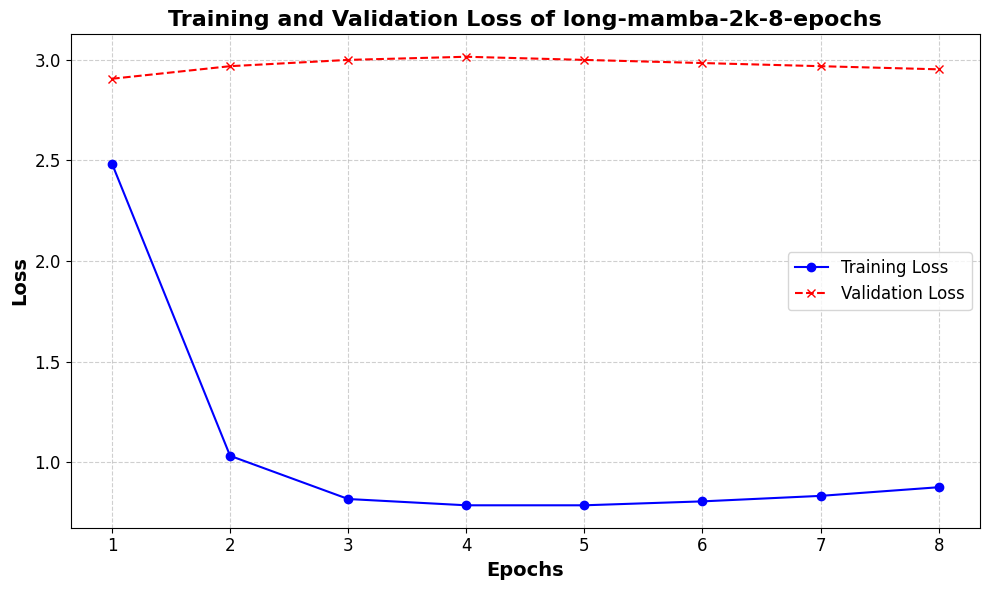

In [17]:
train_loss_of_long_mamba_2k_8epochs = [2.484375, 1.03125, 0.81640625, 0.78515625, 0.78515625, 0.8046875, 0.83203125, 0.875]
validation_loss_of_long_mamba_2k_8epochs = [2.90625, 2.96875, 3.0, 3.015625, 3.0, 2.984375, 2.96875, 2.953125]
plot_loss(train_loss_of_long_mamba_2k_8epochs, validation_loss_of_long_mamba_2k_8epochs, 'long-mamba-2k-data-8-epochs')


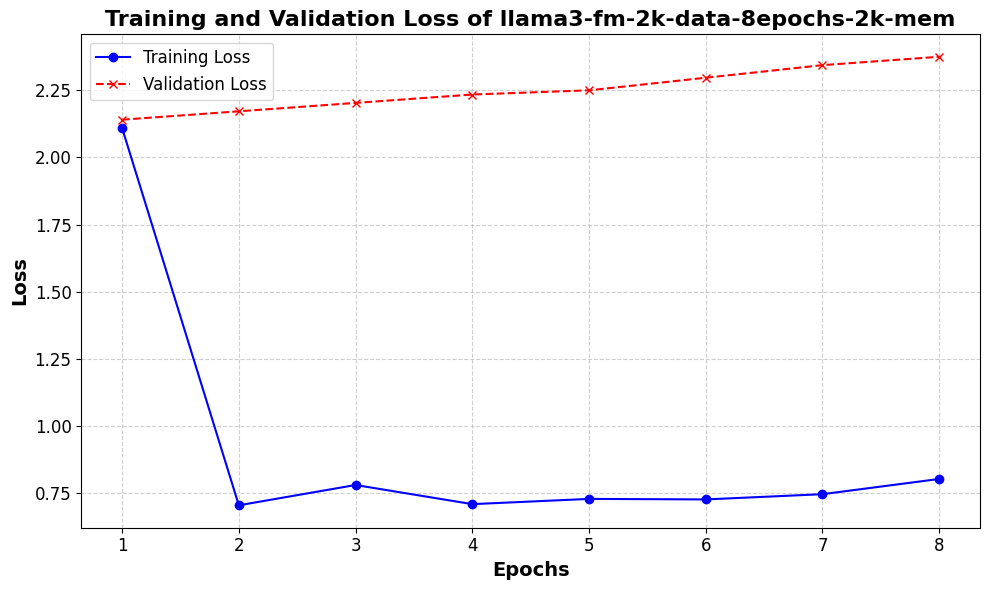

In [28]:
train_loss_of_llama3_fm_2k_8epochs = [2.109375, 0.7047119140625, 0.7802734375, 0.708984375, 0.728515625, 0.7265625, 0.74609375, 0.802734375]
validation_loss_of_llama3_fm_2k_8epochs = [2.140625, 2.171875, 2.203125, 2.234375, 2.25, 2.296875, 2.34375, 2.375]
plot_loss(train_loss_of_llama3_fm_2k_8epochs, validation_loss_of_llama3_fm_2k_8epochs, 'llama3-fm-2k-data-8epochs-2k-mem')

#### 增加Memory Size

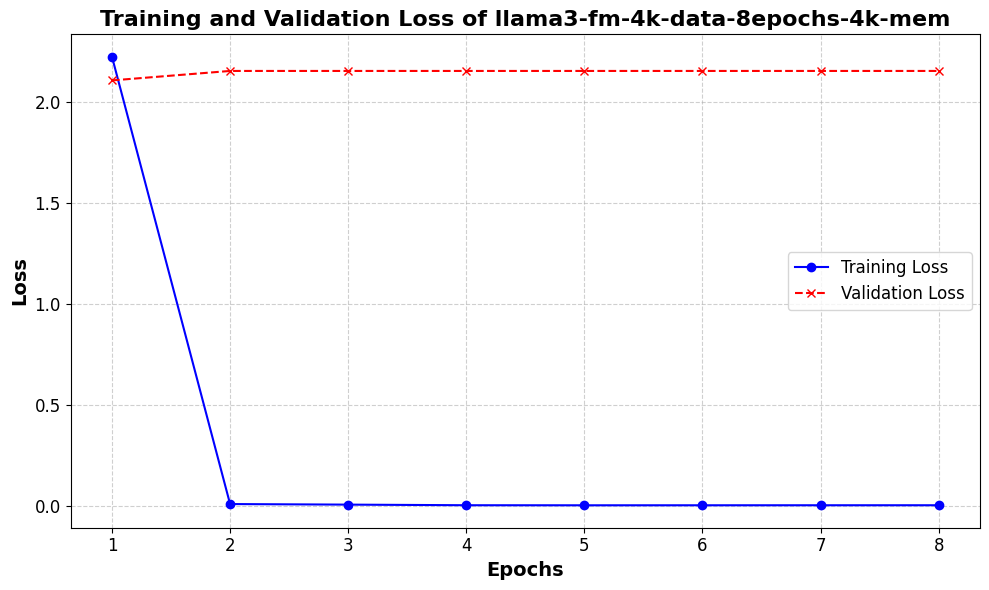

In [29]:
train_loss_of_llama3_fm_4k_8epochs_4kmem = [2.2265625, 0.009372711181640625, 0.006549835205078125, 0.0035200119018554688, 0.003211498260498047, 0.003301382064819336, 0.003410935401916504, 0.003453373908996582]
validation_loss_of_llama3_fm_4k_8epochs_4kmem = [2.109375, 2.15625, 2.15625, 2.15625, 2.15625, 2.15625, 2.15625, 2.15625]
plot_loss(train_loss_of_llama3_fm_4k_8epochs_4kmem, validation_loss_of_llama3_fm_4k_8epochs_4kmem, title="llama3-fm-4k-data-8epochs-4k-mem")

减少Data Size和增加Memory Size对于学习的收敛都是有帮助的

#### 调整学习率: 动态增加memory size

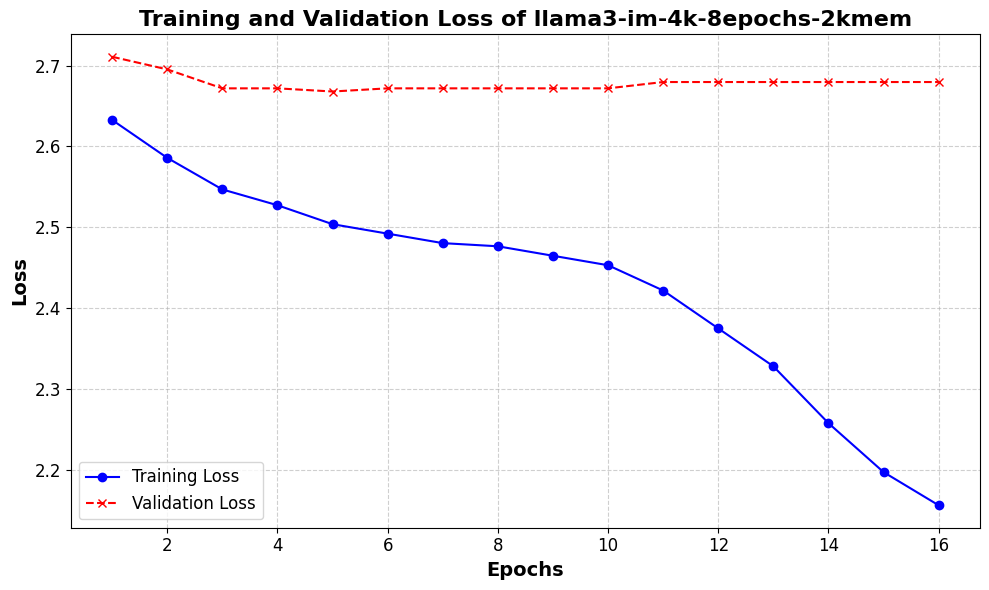

In [9]:
train_loss_of_llama3_im_4k_8epochs_2kmem = [2.6328125, 2.5859375, 2.546875, 2.52734375, 2.50390625, 2.4921875, 2.48046875, 2.4765625, 2.46484375, 2.453125, 2.421875, 2.375, 2.328125, 2.2578125, 2.197265625, 2.15625]
validation_loss_of_llama3_im_4k_8epochs_2kmem = [2.7109375, 2.6953125, 2.671875, 2.671875, 2.66796875, 2.671875, 2.671875, 2.671875, 2.671875, 2.671875, 2.6796875, 2.6796875, 2.6796875, 2.6796875, 2.6796875, 2.6796875]
plot_loss(train_loss_of_llama3_im_4k_8epochs_2kmem, validation_loss_of_llama3_im_4k_8epochs_2kmem, title="llama3-im-4k-8epochs-2kmem")


## 数据量越大, 学习效果越好吗?

In [2]:
import matplotlib.pyplot as plt

def plot_loss_with_datasizes(data_sizes, training_loss, validation_loss, title=None):
    """
    绘制训练损失和验证损失。

    参数:
    training_loss (list): 每个周期的训练损失。
    validation_loss (list): 每个周期的验证损失。
    """
    plt.figure(figsize=(10, 6))
    assert len(training_loss) == len(validation_loss)
    plt.plot(data_sizes, training_loss, label='Training Loss', color='blue', linestyle='-', marker='o')
    plt.plot(data_sizes, validation_loss, label='Validation Loss', color='red', linestyle='--', marker='x')

    plt.xlabel('Num Training Tokens', fontsize=14, fontweight='bold')
    plt.ylabel('Loss', fontsize=14, fontweight='bold')
    if title is not None: 
        plt.title(f'Training and Validation Loss of {title}', fontsize=16, fontweight='bold')
    else:
        plt.title(f'Training and Validation Loss', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xscale('log')
    plt.tight_layout()
    plt.show()


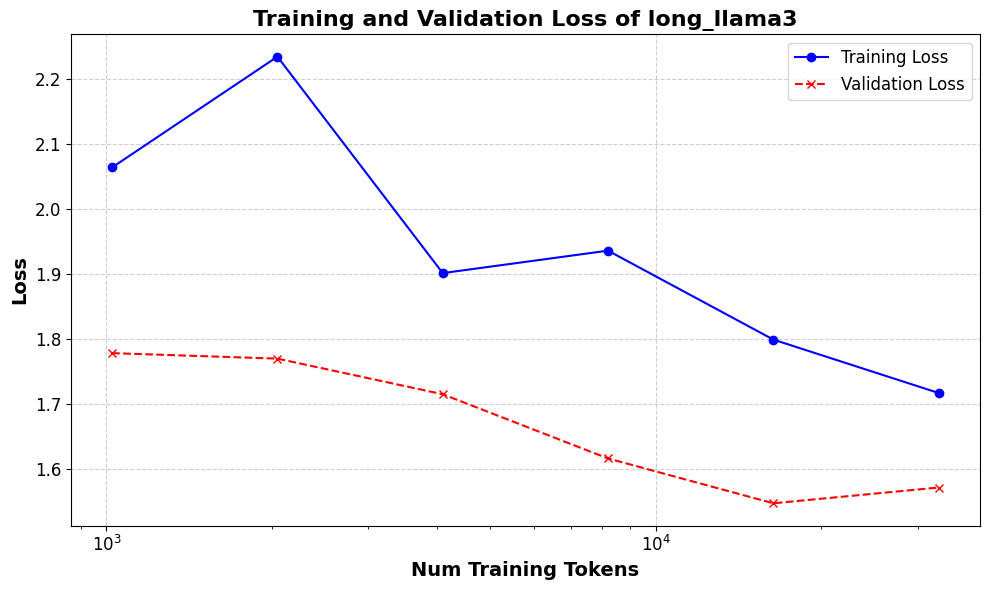

In [8]:
data_sizes = [1, 2, 4, 8, 16, 32]
data_sizes = [s * 1024 for s in data_sizes]
train_loss_of_long_llama3 = [2.064152717590332, 2.2346487045288086, 1.9014828205108643, 1.9360233545303345, 1.7991108894348145, 1.7168949842453003]
validation_loss_long_llama3 = [1.7782598733901978, 1.7698369026184082, 1.7149940729141235, 1.6161199808120728, 1.5471333265304565, 1.571419358253479]
plot_loss_with_datasizes(data_sizes, train_loss_of_long_llama3, validation_loss_long_llama3, title="long_llama3")

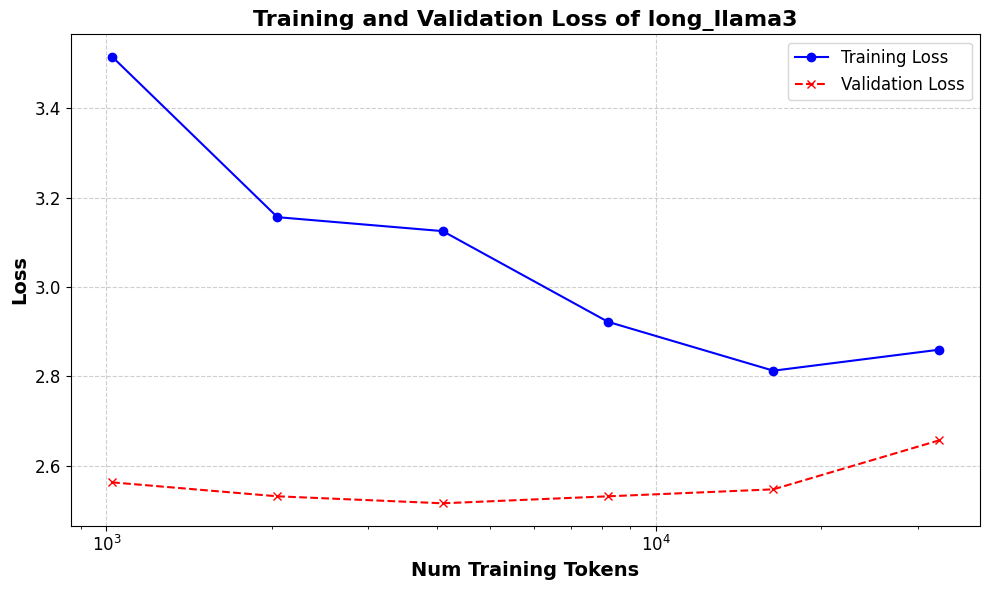

In [24]:
data_sizes = [1, 2, 4, 8, 16, 32]
data_sizes = [s * 1024 for s in data_sizes]
train_loss_of_long_mamba = [2.578125, 1.1796875, 0.9765625, 2.921875, 2.8125, 2.859375]
validation_loss_long_mamba = [2.5625, 2.53125, 2.515625, 2.53125, 2.546875, 2.65625] 
plot_loss_with_datasizes(data_sizes, train_loss_of_long_mamba, validation_loss_long_mamba, title="long_llama3")

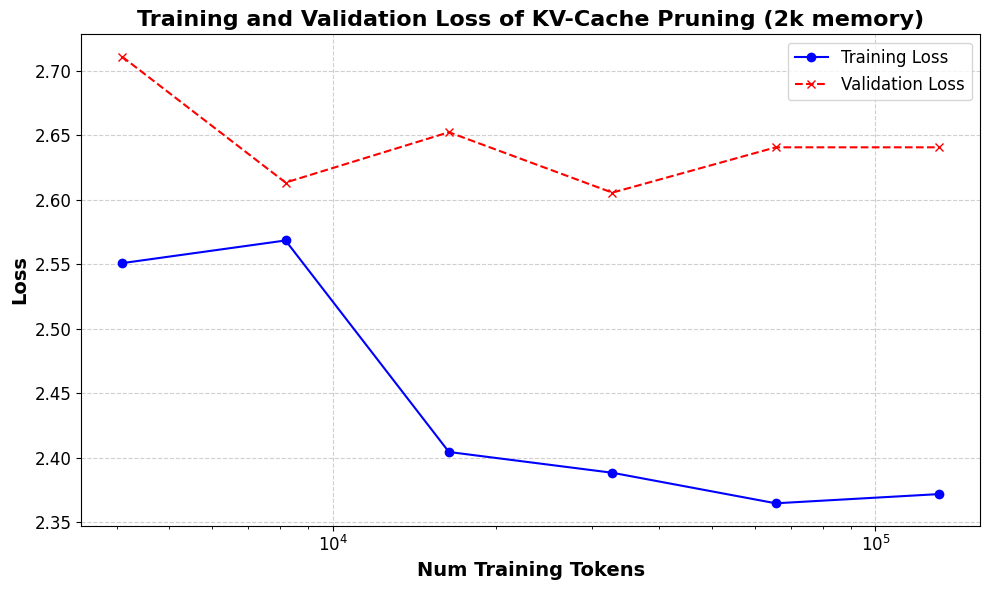

In [9]:
data_sizes = [1, 2, 4, 8, 16, 32, 64, 128]
data_sizes = [s * 1024 for s in data_sizes]
train_loss_of_FM_2k_mem = [2.515625, 2.4609375, 2.55078125, 2.568359375, 2.404296875, 2.38818359375, 2.364501953125, 2.37164306640625]
validation_loss_FM_2k_mem = [2.703125, 2.6796875, 2.7109375, 2.61328125, 2.65234375, 2.60546875, 2.640625, 2.640625] 
plot_loss_with_datasizes(data_sizes[-6:], train_loss_of_FM_2k_mem[-6:], validation_loss_FM_2k_mem[-6:], title="KV-Cache Pruning (2k memory)")

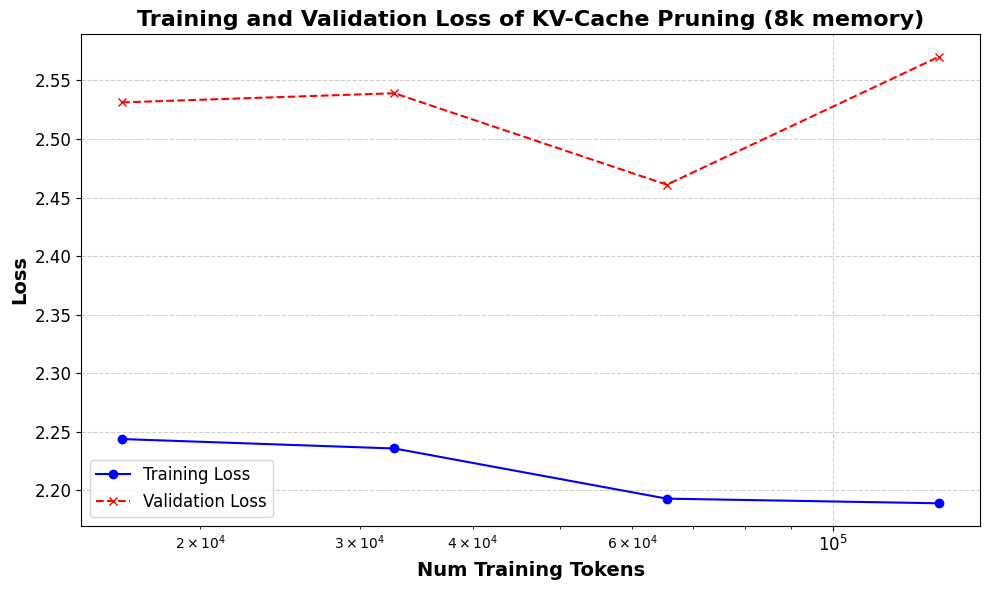

In [66]:
data_sizes = [1, 2, 4, 8, 16, 32, 64, 128]
data_sizes = [s * 1024 for s in data_sizes]
train_loss_of_FM_8k_mem = [2.515625, 2.4453125, 2.484375, 2.431640625, 2.24365234375, 2.235595703125, 2.1927490234375, 2.18878173828125]
validation_loss_FM_8k_mem = [2.60546875, 2.5703125, 2.55078125, 2.42578125, 2.53125, 2.5390625, 2.4609375, 2.5703125] 
plot_loss_with_datasizes(data_sizes[-4:], train_loss_of_FM_8k_mem[-4:], validation_loss_FM_8k_mem[-4:], title="KV-Cache Pruning (8k memory)")

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def plot_smoothed_loss_curve(loss_data, window_size=1024, sigma=1.0, yline=None):
    """
    绘制并平滑 loss 曲线

    参数:
    - loss_data (dict): 包含损失数据的字典，键为 epoch，值为 loss
    - sigma (float): 高斯滤波的标准差，控制平滑程度

    返回:
    - None
    """
    # 提取 keys 和 values
    if isinstance(loss_data, dict):
        steps = list(loss_data.keys())
        losses = list(loss_data.values())
    else:
        steps = (np.array(list(range(len(loss_data)))) + 1) * window_size
        losses = loss_data
    # 应用高斯滤波进行平滑
    smoothed_losses = gaussian_filter1d(losses, sigma=sigma)
    # 绘制原始和平滑后的 loss 曲线
    plt.figure(figsize=(10, 5))
    plt.plot(steps, losses, label='Original Loss', linestyle='--', marker='o')
    plt.plot(steps, smoothed_losses, label='Smoothed Loss', linestyle='-', marker='x')
    if yline is not None:
        plt.axhline(y=yline, color='r', linestyle='--')

    plt.xlabel('Steps')
    plt.xscale('log')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

In [ ]:
def plot_multi_groups_of_loss_curve(loss_data_groups, window_size=1024):
    """
    绘制并平滑 loss 曲线

    参数:
    - loss_data (dict): 包含损失数据的字典，键为 epoch，值为 loss
    - sigma (float): 高斯滤波的标准差，控制平滑程度

    返回:
    - None
    """
    plt.figure(figsize=(10, 5))
    for group in loss_data_groups:
        # 提取 keys 和 values
        if isinstance(group, dict):
            steps = list(group.keys())
            losses = list(group.values())
        else:
            steps = (np.array(list(range(len(group)))) + 1) * window_size
            losses = group
        # 应用高斯滤波进行平滑
        plt.plot(steps, losses, linestyle='--', marker='o')
        
    plt.xlabel('Steps')
    plt.xscale('log')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_avg_of_loss_curve(loss_data_groups, window_size=1024, show_min_max=True):
    """
    绘制多组损失曲线，并根据用户选择显示平均值、最大值和最小值

    参数:
    - loss_data_groups (list): 包含多组损失数据的列表，每组数据可以是字典或列表
    - window_size (int): 用于绘制曲线的窗口大小
    - show_min_max (bool): 是否显示最小值和最大值曲线以及填充区域

    返回:
    - None
    """
    plt.figure(figsize=(10, 5))

    # 将所有组的损失数据合并到一个列表中，以便计算统计量
    combined_losses = []
    steps = None

    for group in loss_data_groups:
        if isinstance(group, dict):
            if steps is None:
                steps = np.array(list(group.keys()))
            losses = np.array(list(group.values()))
        else:
            if steps is None:
                steps = (np.array(list(range(len(group)))) + 1) * window_size
            losses = np.array(group)
        combined_losses.append(losses)

    # 将所有损失转换为numpy数组
    combined_losses = np.array(combined_losses)
    
    # 计算平均值
    mean_losses = np.mean(combined_losses, axis=0)

    # 绘制平均值曲线
    plt.plot(steps, mean_losses, label='Mean Loss', color='blue', linestyle='-', marker='o')

    if show_min_max:
        # 计算最大值和最小值
        max_losses = np.max(combined_losses, axis=0)
        min_losses = np.min(combined_losses, axis=0)

        # 绘制最大值和最小值曲线
        plt.plot(steps, max_losses, label='Max Loss', color='red', linestyle='--', marker='x')
        plt.plot(steps, min_losses, label='Min Loss', color='green', linestyle='--', marker='x')

        # 填充最大值和最小值之间的区域
        plt.fill_between(steps, min_losses, max_losses, color='gray', alpha=0.2, label='Range (Min-Max)')

    plt.xlabel('Steps')
    plt.xscale('log')
    plt.ylabel('Loss')
    plt.title('Loss Curve with Mean, Max, and Min')
    plt.legend()
    plt.show()

# 示例调用
# loss_data_groups = [
#     {1: 0.5, 2: 0.4, 3: 0.35, 4: 0.3},
#     {1: 0.6, 2: 0.45, 3: 0.4, 4: 0.33},
#     {1: 0.55, 2: 0.42, 3: 0.38, 4: 0.31}
# ]

# plot_multi_groups_of_loss_curve(loss_data_groups, window_size=1024, show_min_max=False)


## Scaling Law of Full Attention

Summary:
- 不管在什么数据上Full Attention总是能表现出log linear scaling law
- 在不同数据上的scaling的系数差别很大，其中在book上的scaling效果是最好的

TODO:
- multi-epochs
- larger data size (量化/模型并行 & NTK) 
- more data types

Scaling Law on Zhihu

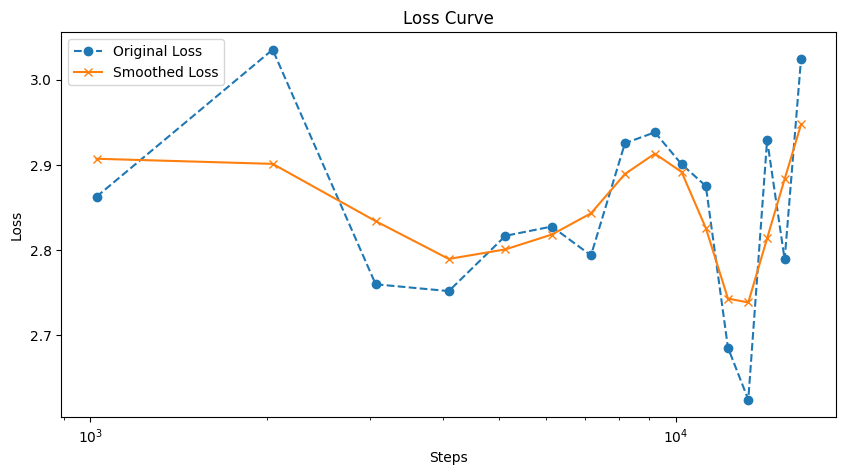

In [10]:
train_loss_scaling_of_llama31_FA_Zhihu = [2.862456349476594, 3.0354385636872854, 2.759484012331252, 2.7514849105532186, 2.8165022456048234, 2.827433073376353, 2.793452577508488, 2.925370427650854, 2.938191513551972, 2.90063796754171, 2.875103000283164, 2.684984438142678, 2.6238791983619225, 2.929446775287179, 2.7886708609391446, 3.0247057084779816]
plot_smoothed_loss_curve(train_loss_scaling_of_llama31_FA_Zhihu)

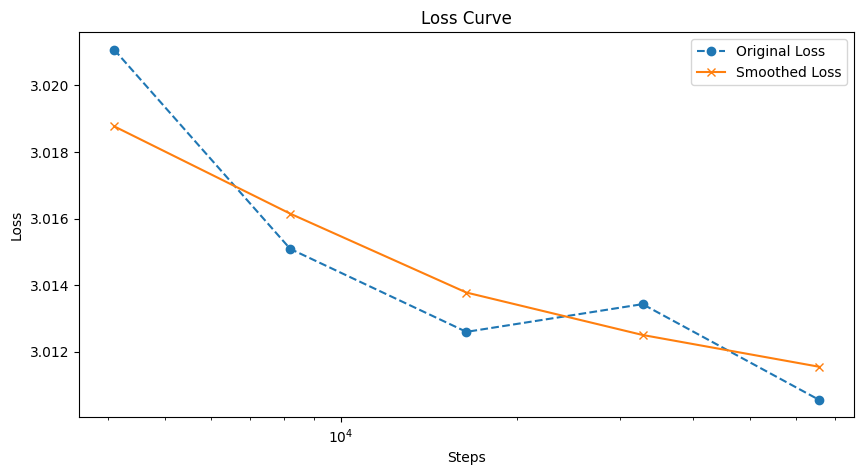

In [12]:
eval_loss_scaling_of_llama31_FA_Zhihu = {4096:3.0210742950439453, 8192:3.0150864124298096, 16384:3.0125937461853027, 32768:3.0134270191192627, 65536:3.0105581283569336}
plot_smoothed_loss_curve(eval_loss_scaling_of_llama31_FA_Zhihu)

Scaling law on MTOB

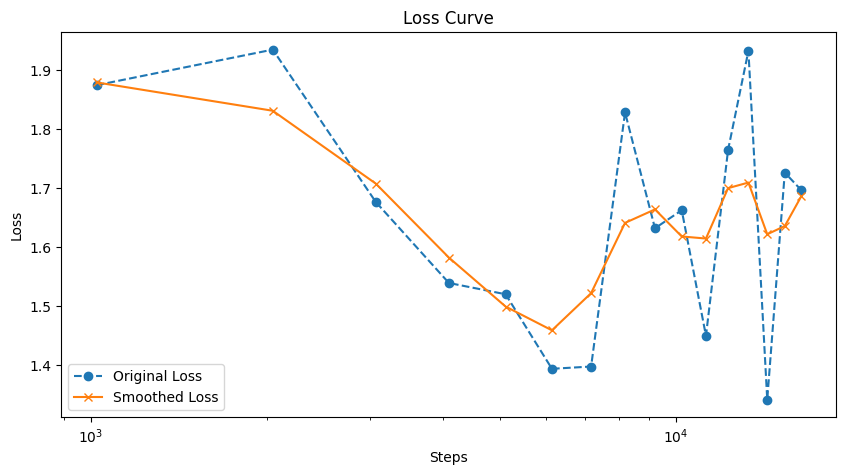

In [8]:
train_loss_scaling_of_llama31_FA_motb = [1.874486305296561, 1.934723496964251, 1.6766143298598064, 1.5394377131935615, 1.5203244551351656, 1.3940511650700618, 1.397892045240276, 1.8283255594891834, 1.6321169502930637, 1.6626854000074704, 1.4499073739259352, 1.764775767827782, 1.9325736040988897, 1.3418313904102224, 1.726413242998822, 1.6968444071647015]
plot_smoothed_loss_curve(train_loss_scaling_of_llama31_FA_motb)

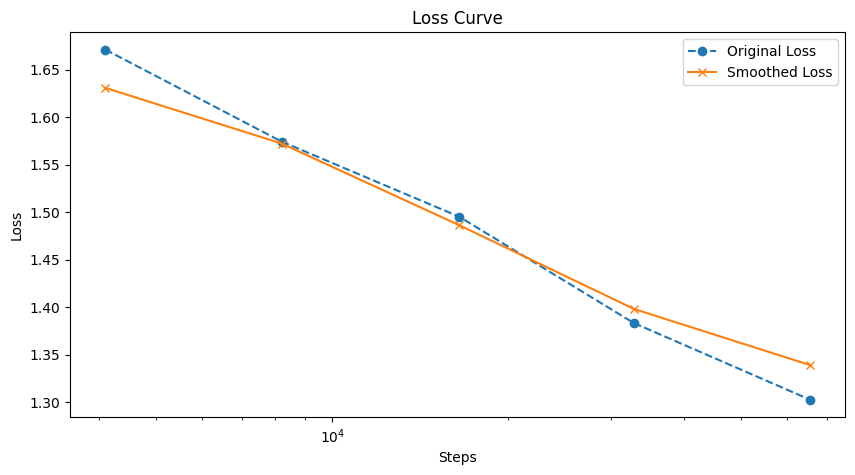

In [9]:
eval_loss_scaling_of_llama31_8B_FA_mtob = {4096:1.6712092161178589, 8192:1.5744034051895142, 16484:1.495233416557312, 32768:1.3832718133926392, 65536:1.30257248878479}
plot_smoothed_loss_curve(eval_loss_scaling_of_llama31_8B_FA_mtob)

Scaling law on OpenOrca (LLama-3.1-8B-Instruct)

Instruct Model的Scaling效果比Base Model好很多

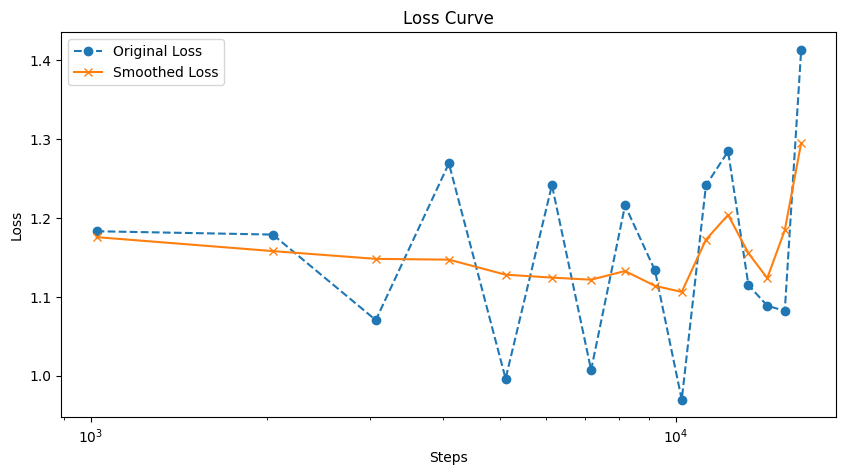

In [3]:
train_loss_scaling_of_llama31_instruct_FA_orca = [1.1830338582466697, 1.1788299187373166, 1.0705196329902917, 1.2689347311445656, 0.996361550608297, 1.2414677049957368, 1.007369875827968, 1.2157486851130888, 1.1334402820964902, 0.9697980904568261, 1.2411107374870465, 1.28427193053505, 1.1148793244303825, 1.0888049161915463, 1.0821261404518512, 1.4130743462184088]
plot_smoothed_loss_curve(train_loss_scaling_of_llama31_instruct_FA_orca)

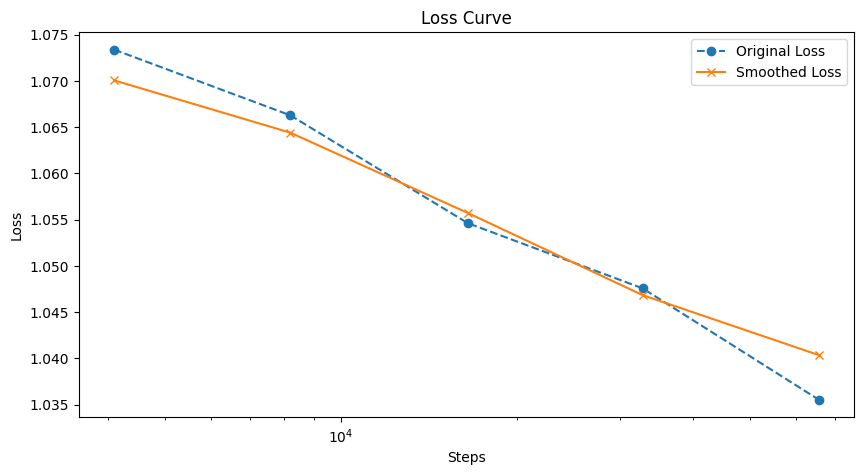

In [3]:
eval_loss_scaling_of_llama31_8B_instruct_FA_orca = {4096:1.073386788368225, 8192:1.0662821531295776, 16484:1.0546092987060547, 32768:1.0475677251815796, 65536:1.0355280637741089}
plot_smoothed_loss_curve(eval_loss_scaling_of_llama31_8B_instruct_FA_orca)

Scaling law on Openorca (LLama-3.1-8B)

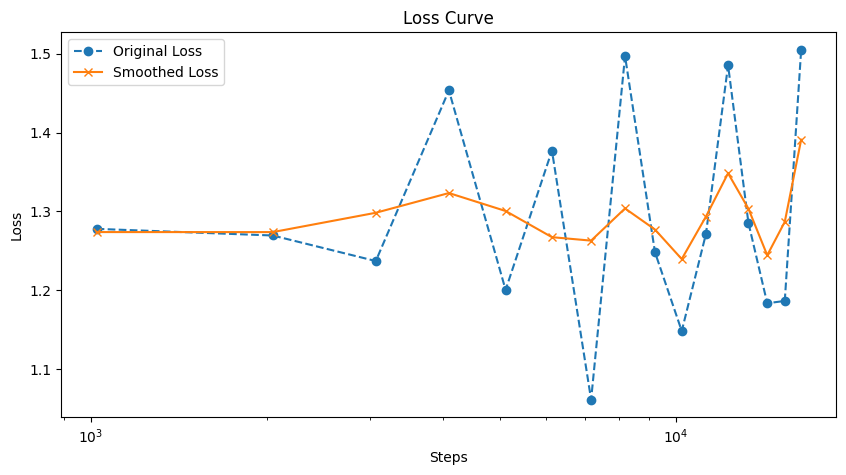

In [5]:
train_loss_scaling_of_llama31_8B_FA_orca = [1.2779645112738565, 1.269540138245176, 1.2371452506130094, 1.4535438129278213, 1.2005073018942785, 1.3772756804171051, 1.0614051572752998, 1.4970905589189434, 1.248316539453439, 1.1483980434669017, 1.2715689934680594, 1.485379172711759, 1.2856669805804553, 1.1835811592142187, 1.1865825639891188, 1.5052450572575016]
plot_smoothed_loss_curve(train_loss_scaling_of_llama31_8B_FA_orca)

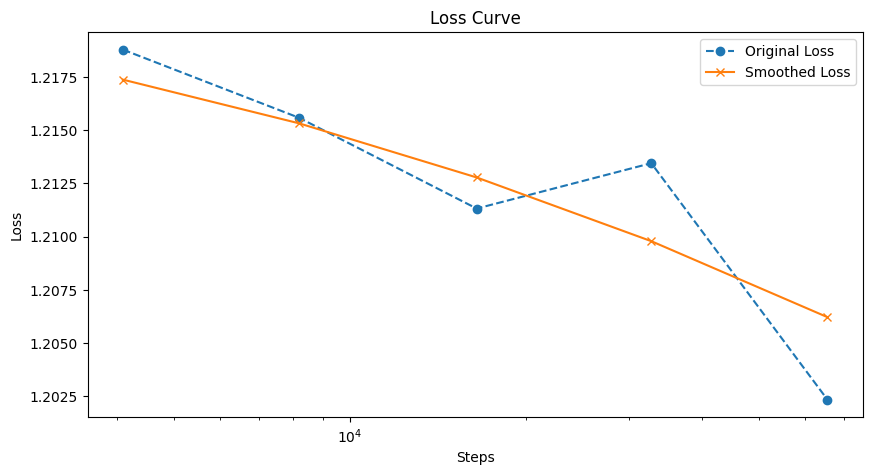

In [4]:
eval_loss_scaling_of_llama31_8B_FA_orca = {4096:1.218777060508728, 8192:1.215578317642212, 16484:1.2113155126571655, 32768:1.2134454250335693, 65536:1.202345371246338}
plot_smoothed_loss_curve(eval_loss_scaling_of_llama31_8B_FA_orca)

Scaling law on GSM-8k

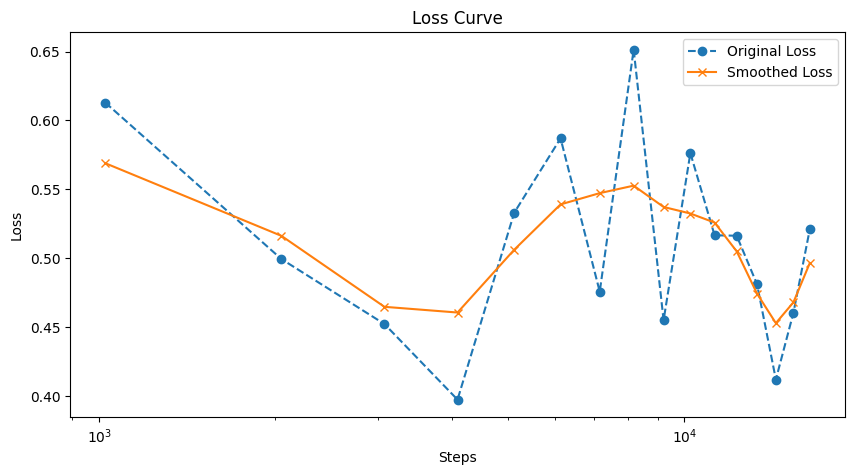

In [3]:
train_loss_scaling_of_llama31_8B_instruct_FA_gsm8k = [0.6129930144348962, 0.499446722789717, 0.45230394241147204, 0.3974394382631017, 0.5330449620373479, 0.5870432544615506, 0.475787055945192, 0.6514198781374444, 0.4550704931617554, 0.5763351622740259, 0.516694155131102, 0.5163707689255241, 0.4811561799390639, 0.4120142365107333, 0.4603773815929478, 0.5210757267377552]
plot_smoothed_loss_curve(train_loss_scaling_of_llama31_8B_instruct_FA_gsm8k)

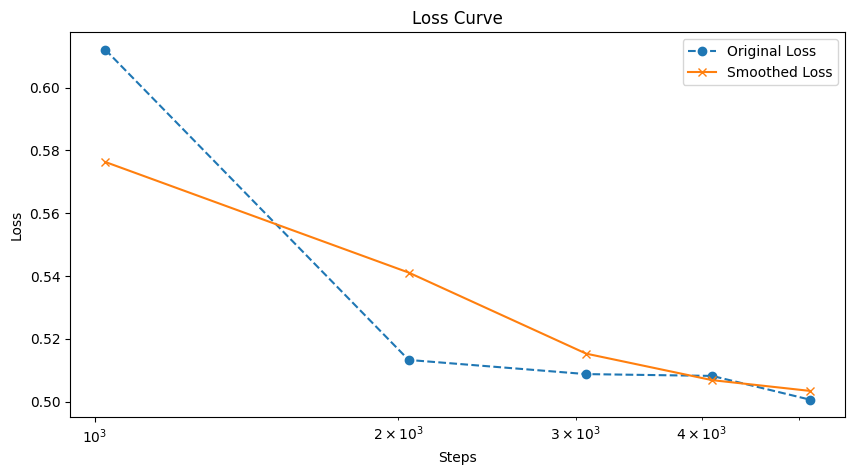

In [4]:
eval_loss_scaling_of_llama31_8B_instruct_FA_gsm8k = [0.6121004351668068, 0.5132542252540588, 0.5087475776672363, 0.5081720352172852, 0.5006170868873596]
plot_smoothed_loss_curve(eval_loss_scaling_of_llama31_8B_instruct_FA_gsm8k)

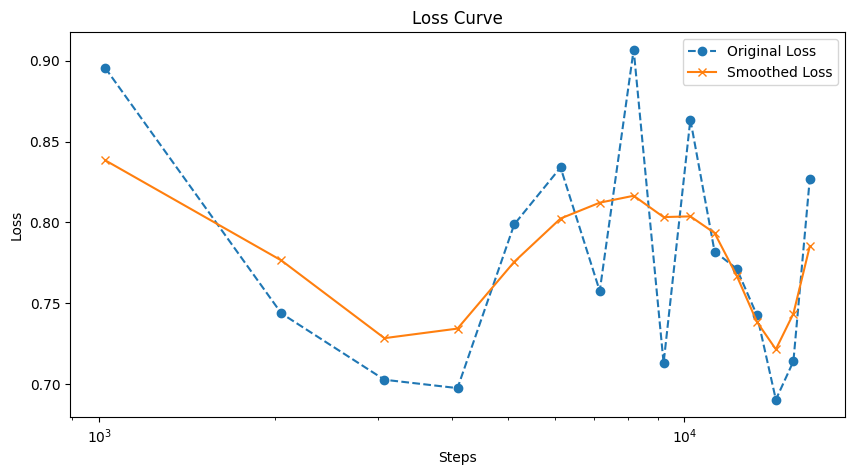

In [13]:
train_loss_scaling_of_llama31_8B_FA_gsm8k = [0.8954927482798216, 0.7436717721396757, 0.7026509627375509, 0.6974730395793869, 0.7987549993182372, 0.8339529485254277, 0.7575495776215757, 0.9068554988781576, 0.712958758747204, 0.8636078007019412, 0.7819374780817405, 0.7713117351757097, 0.7424412930511237, 0.6903535991903466, 0.7140402105429142, 0.8271180313571271]
plot_smoothed_loss_curve(train_loss_scaling_of_llama31_8B_FA_gsm8k)

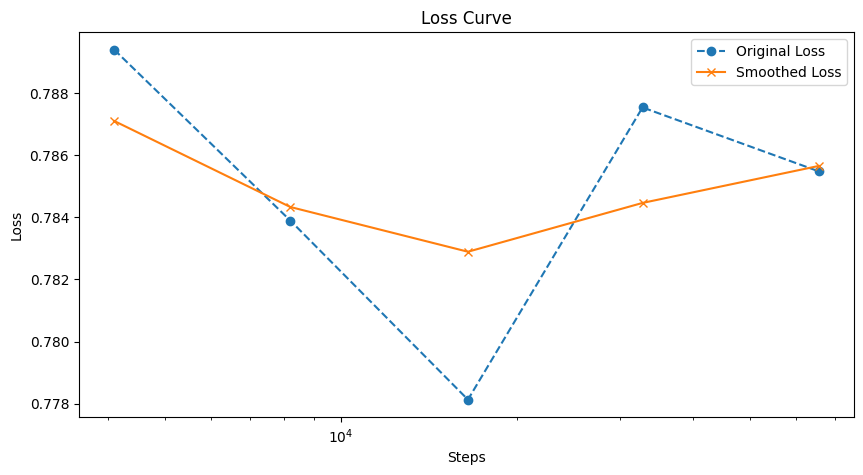

In [6]:
eval_loss_scaling_of_llama31_8B_FA_gsm8k = {4096:0.7894124984741211, 8192:0.7839012145996094, 16484:0.7781262397766113, 32768:0.7875480055809021, 65536:0.7854881882667542}
plot_smoothed_loss_curve(eval_loss_scaling_of_llama31_8B_FA_gsm8k)

## Scaling law of KV-Cache Pruning

In [7]:
def dict_to_list(data):
    num_tokens = np.array([2**i for i in range(2, 11)]) * 1024
    data = [dict([(a,b) for a,b in zip(num_tokens, v)]) for k,v in data.items()]
    return data

scaling law on MTOB (Fixed-Size Memory)

In [8]:
eval_loss_scaling_of_kvcache_prune_MTOB = {40: [1.847655788086053, 1.8515620371094907, 1.8066401733399566, 1.7773433056641734, 1.8593745351563662, 1.7675776831055792, 1.8066401733399566, 1.7968745507813622, 1.8066401733399566], 41: [1.8984370253907437, 1.9121088969727758, 1.8574214106446472, 1.892577651855587, 1.9179682705079324, 1.8808589047852737, 1.8710932822266795, 1.9296870175782455, 1.9316401420899645], 42: [1.847655788086053, 1.8652339086915228, 1.9453120136719966, 1.9433588891602775, 1.9316401420899645, 1.9296870175782455, 1.953124511718872, 1.876952655761836, 1.878905780273555]}
plot_avg_of_loss_curve(dict_to_lsit(eval_loss_scaling_of_kvcache_prune_MTOB), window_size=4096, show_min_max=False)

NameError: name 'dict_to_lsit' is not defined

scaling law on openorca (snapkv 2k)

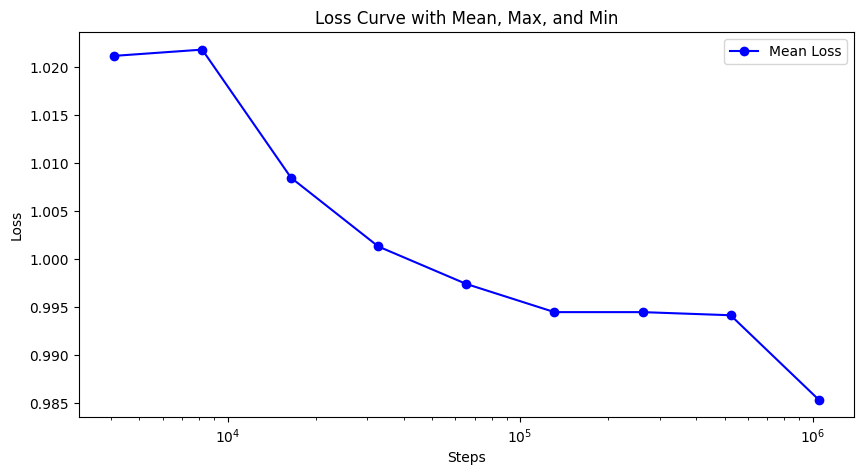

In [16]:
eval_loss_scaling_of_kvcache_prune_orca1 = {4096:0.8779294680176329, 8192:0.8759763435059141, 16484:0.8857419660645085, 32768:0.8652341586914603, 65536:0.8593747851563037, 131072:0.8691404077148981, 262144: 0.8603513474121631, 524288:0.8613279096680225, 1048576:0.8496091625977094}
eval_loss_scaling_of_kvcache_prune_orca2 = {4096:1.0996091000977248, 8192:1.1035153491211627, 16484:1.0781247304688173, 32768:1.0761716059570985, 65536:1.0742184814453797, 131072:1.0742184814453797, 262144: 1.0761716059570985, 524288: 1.083984104003974, 1048576:1.0781247304688173}
eval_loss_scaling_of_kvcache_prune_orca3 = {4096:1.0859372285156927, 8192:1.0859372285156927, 16484:1.0615231721192069, 32768:1.0624997343750664, 65536:1.0585934853516286, 131072:1.0400388024902993, 262144: 1.0468747382813155, 524288:1.037109115722721, 1048576:1.028320055419986}
plot_avg_of_loss_curve([eval_loss_scaling_of_kvcache_prune_orca1, eval_loss_scaling_of_kvcache_prune_orca2, eval_loss_scaling_of_kvcache_prune_orca3], window_size=4096, show_min_max=False)
# {40: [0.9755856936035766, 0.9804685048828737, 0.9755856936035766], 41: [1.054687236328191, 1.0615231721192069, 1.0537106740723314], 42: [1.207030948242263, 1.207030948242263, 1.205077823730544]}

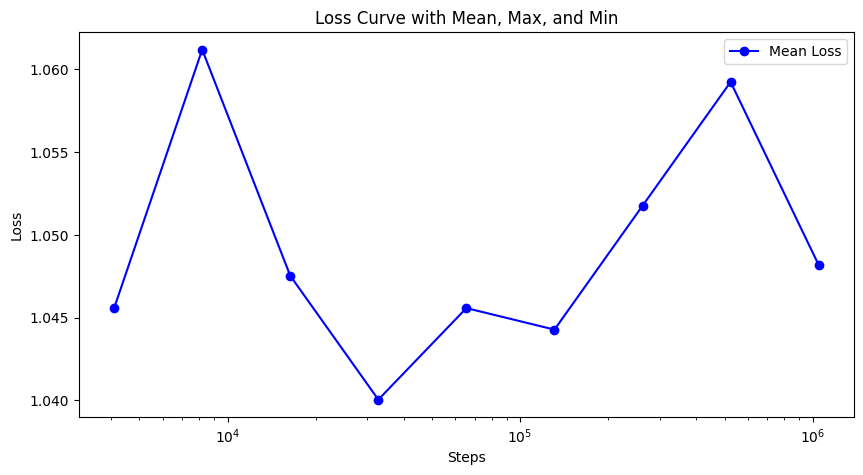

In [4]:
eval_loss_scaling_of_snapkv_orca_1k = {40: [0.907226335693416, 0.916015395996151, 0.9111325847168538, 0.8964841508789623, 0.9023435244141189, 0.9140622714844321, 0.909179460205135, 0.9169919582520104, 0.9042966489258377], 41: [1.1230465942383514, 1.128905967773508, 1.1269528432617892, 1.1132809716797571, 1.1269528432617892, 1.1132809716797571, 1.1230465942383514, 1.1425778393555401, 1.128905967773508], 42: [1.106445035888741, 1.1386715903321023, 1.1044919113770222, 1.1103512849121788, 1.1074215981446005, 1.1054684736328815, 1.1230465942383514, 1.1181637829590543, 1.1113278471680381]}
plot_avg_of_loss_curve(dict_to_list(eval_loss_scaling_of_snapkv_orca_1k), show_min_max=False)

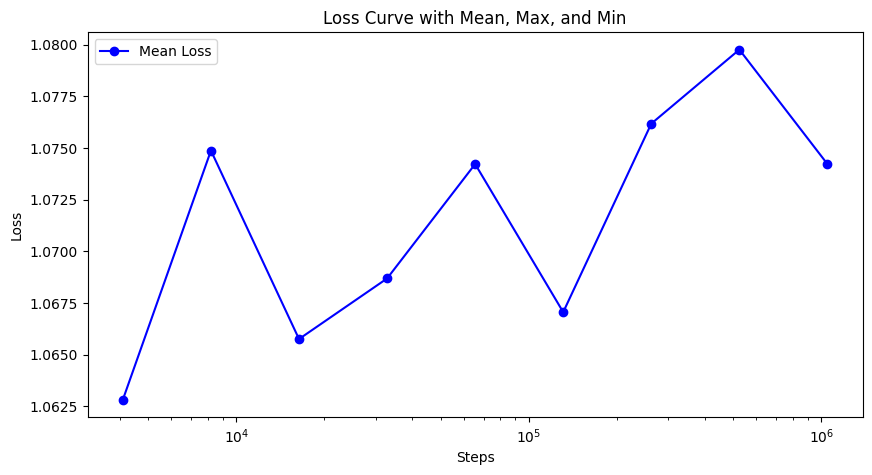

In [5]:
eval_loss_scaling_of_snapkv_orca_512 = {40: [0.9208982072754481, 0.9287107053223236, 0.9238278940430265, 0.9189450827637293, 0.9248044562988859, 0.9365232033691991, 0.9345700788574802, 0.9414060146484963, 0.9316403920899019], 41: [1.1308590922852269, 1.1484372128906968, 1.1425778393555401, 1.144530963867259, 1.16015595996101, 1.1249997187500702, 1.1425778393555401, 1.1562497109375722, 1.1425778393555401], 42: [1.1367184658203835, 1.1474606506348373, 1.1308590922852269, 1.1425778393555401, 1.137695028076243, 1.1396481525879618, 1.151366899658275, 1.1416012770996806, 1.1484372128906968]}
plot_avg_of_loss_curve(dict_to_list(eval_loss_scaling_of_snapkv_orca_512), show_min_max=False)

scaling law on openorca (streamingllm 2k)

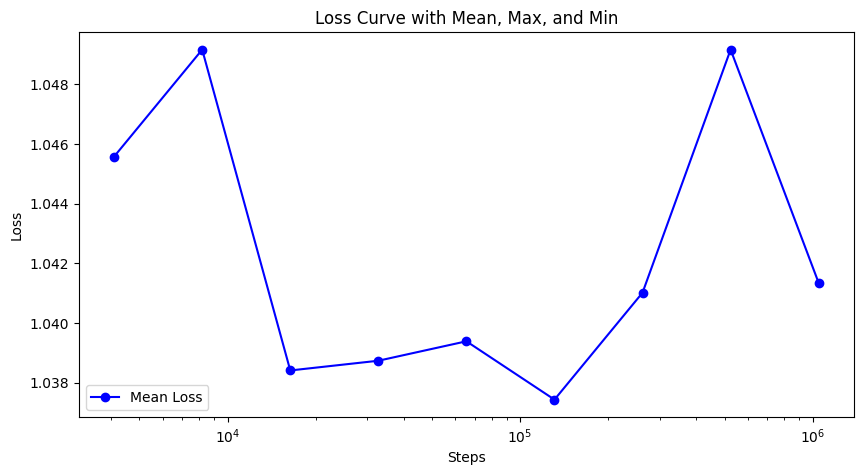

In [9]:
eval_loss_scaling_of_streamingllm_orca_2k = {40: [0.9248044562988859, 0.9316403920899019, 0.9335935166016208, 0.916015395996151, 0.9140622714844321, 0.9296872675781831, 0.9257810185547454, 0.9335935166016208, 0.9208982072754481], 41: [1.115234096191476, 1.1035153491211627, 1.0898434775391306, 1.0937497265625684, 1.1035153491211627, 1.0898434775391306, 1.0898434775391306, 1.1191403452149136, 1.1015622246094439], 42: [1.0966794133301467, 1.1123044094238976, 1.0917966020508494, 1.106445035888741, 1.1005856623535843, 1.092773164306709, 1.1074215981446005, 1.0947262888184277, 1.1015622246094439]}

plot_avg_of_loss_curve(dict_to_list(eval_loss_scaling_of_streamingllm_orca_2k), show_min_max=False)

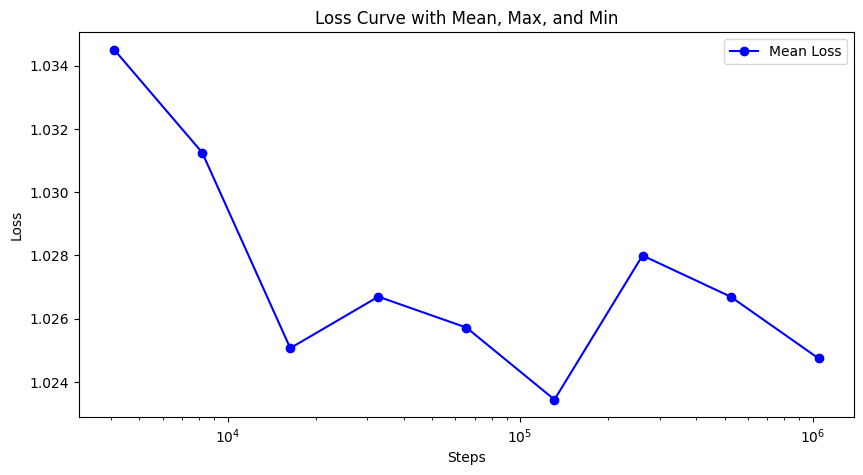

In [11]:
eval_loss_scaling_of_streamingllm_orca_4k = {40: [0.907226335693416, 0.9013669621582594, 0.9248044562988859, 0.9023435244141189, 0.8984372753906811, 0.907226335693416, 0.9042966489258377, 0.916015395996151, 0.893554464111384], 41: [1.1035153491211627, 1.097655975586006, 1.0761716059570985, 1.083984104003974, 1.0917966020508494, 1.0820309794922551, 1.0917966020508494, 1.0937497265625684, 1.1015622246094439], 42: [1.092773164306709, 1.0947262888184277, 1.0742184814453797, 1.0937497265625684, 1.0869137907715523, 1.0810544172363956, 1.0878903530274118, 1.0703122324219418, 1.0791012927246768]}
plot_avg_of_loss_curve(dict_to_list(eval_loss_scaling_of_streamingllm_orca_4k), show_min_max=False)

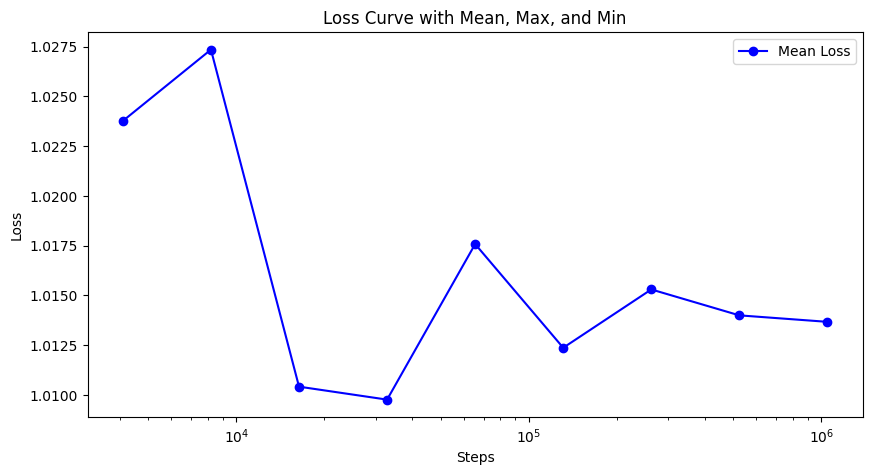

In [12]:
eval_loss_scaling_of_streamingllm_orca_8k = {40: [0.8769529057617735, 0.8857419660645085, 0.8955075886231029, 0.8808591547852113, 0.8876950905762273, 0.8964841508789623, 0.8994138376465406, 0.9003903999024, 0.8769529057617735], 41: [1.0996091000977248, 1.1093747226563193, 1.0673825456543635, 1.0722653569336607, 1.0722653569336607, 1.066405983398504, 1.0781247304688173, 1.0742184814453797, 1.0898434775391306], 42: [1.0947262888184277, 1.0869137907715523, 1.068359107910223, 1.0761716059570985, 1.092773164306709, 1.0742184814453797, 1.068359107910223, 1.0673825456543635, 1.0742184814453797]}
plot_avg_of_loss_curve(dict_to_list(eval_loss_scaling_of_streamingllm_orca_8k), show_min_max=False)

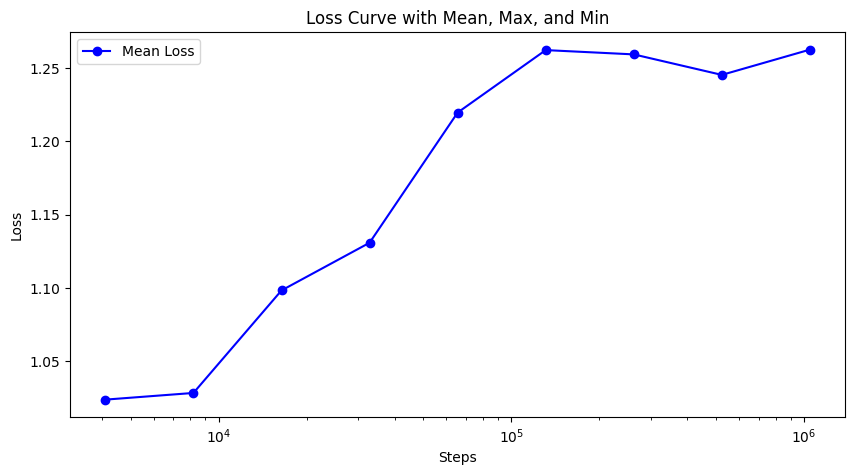

In [5]:
eval_loss_scaling_of_streamingllm_orca_16k = {40: [0.8769529057617735, 0.8769529057617735, 0.9931638142090464, 1.0068356857910785, 1.135741903564524, 1.2011715747071063, 1.1767575183106205, 1.1425778393555401, 1.2041012614746847], 41: [1.0996091000977248, 1.1171872207031948, 1.1718747070313231, 1.2167965708008572, 1.253905936523516, 1.310546547363363, 1.314452796386801, 1.3124996718750819, 1.2890621777344555], 42: [1.0947262888184277, 1.09082003979499, 1.1298825300293676, 1.1689450202637448, 1.2695309326172668, 1.2753903061524234, 1.2871090532227367, 1.28124967968758, 1.2949215512696122]}
plot_avg_of_loss_curve(dict_to_list(eval_loss_scaling_of_streamingllm_orca_16k), show_min_max=False)

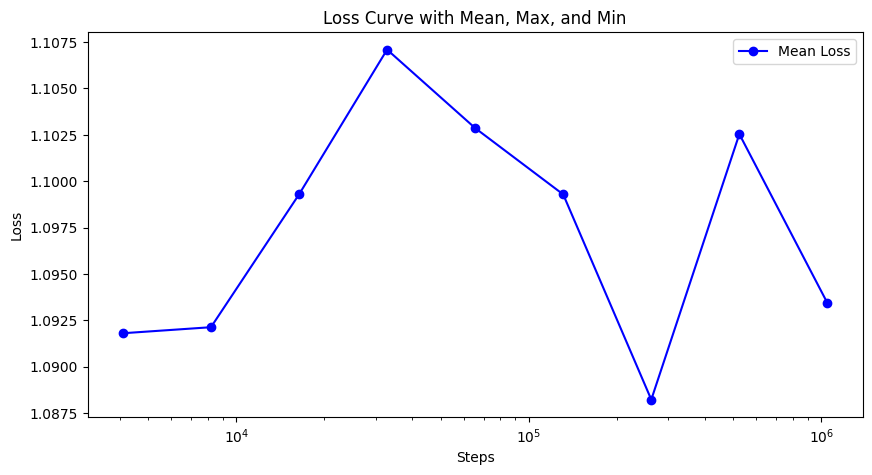

In [4]:
eval_loss_scaling_of_random_orca = {40: [0.9326169543457614, 0.9326169543457614, 0.9345700788574802, 0.9833981916504521, 0.9560544484863879, 0.9492185126953718, 0.9570310107422473, 0.9501950749512312, 0.9746091313477171, 0.9501950749512312], 41: [1.1660153334961665, 1.1679684580078855, 1.1972653256836685, 1.1621090844727289, 1.1679684580078855, 1.1874997031250742, 1.1542965864258534, 1.1777340805664798, 1.1699215825196043, 1.1660153334961665], 42: [1.1767575183106205, 1.175780956054761, 1.1660153334961665, 1.175780956054761, 1.184570016357496, 1.1611325222168694, 1.153320024169994, 1.1796872050781988, 1.135741903564524, 1.1435544016113997]}
plot_avg_of_loss_curve(dict_to_list(eval_loss_scaling_of_random_orca), show_min_max=False)

## Scaling law of Mamba

Scaling law on MTOB (falcon-mamba)

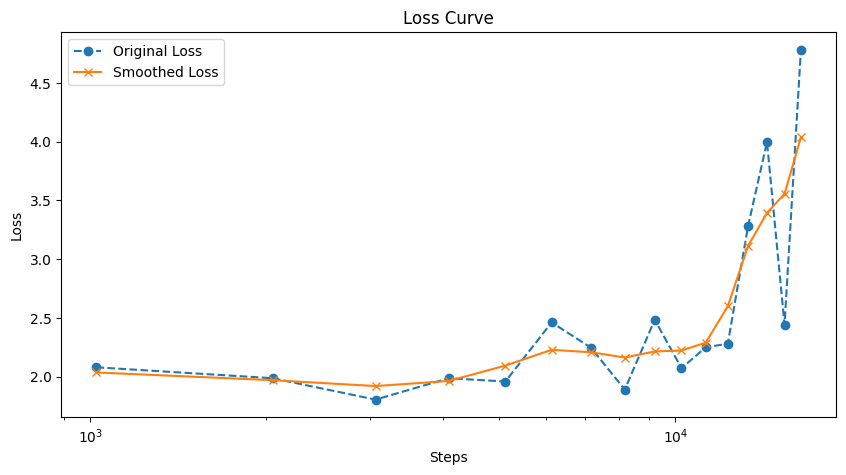

In [5]:
train_loss_scaling_of_falcon_mamba_mtob = [2.0805610133804846, 1.9878611377773414, 1.8056572572465996, 1.9876151041212902, 1.9595942064911318, 2.462346743174807, 2.247784723148916, 1.8913672464119493, 2.484529441688313, 2.0736208194977266, 2.249740230180535, 2.282110181652783, 3.286345403624523, 3.9967820757253776, 2.442257592878299, 4.782770820008335]
plot_smoothed_loss_curve(train_loss_scaling_of_falcon_mamba_mtob)

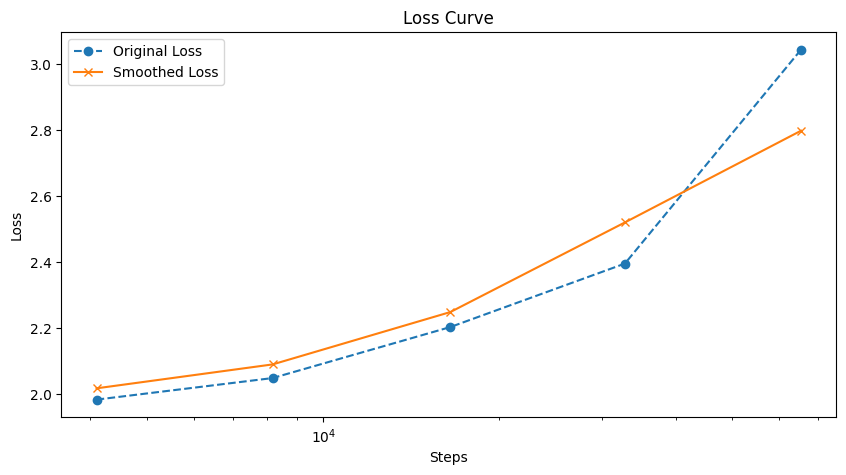

In [20]:
eval_loss_scaling_of_falcon_mamba_orca = {4096:1.9836690425872803, 8192:2.049036979675293, 16484:2.2035787105560303, 32768:2.395941734313965, 65536:3.0442893505096436}
plot_smoothed_loss_curve(eval_loss_scaling_of_falcon_mamba_orca)

scaling law on OpenOrca (Gemma)